In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.calibration import LabelEncoder
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Additional imports for model comparison
import xgboost as xgb
from hmmlearn import hmm
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

In [2]:
output_folder = "/Users/lamahasbini/Library/CloudStorage/OneDrive-AmericanUniversityofBeirut/FYP 2024-25 ECE/FYP_Fall_2024-2025/ML Implementation/RF_first_try/features"
features_df = pd.DataFrame()

for file in os.listdir(output_folder):
    if file.endswith('.csv'):
        file_path = os.path.join(output_folder, file)
        temp = pd.read_csv(file_path)
        parts = file.replace('.csv', '').split('_')
        patient_id = f"{parts[-2]}_{parts[-1]}"
        
        temp['Patient_ID'] = patient_id  
        features_df = pd.concat([features_df, temp], ignore_index=True)

In [3]:
features_df['Sleep_stage'] = features_df['Sleep_stage'].astype(str)
features_df['Sleep_stage'] = features_df['Sleep_stage'].replace('3', '2')
features_df['Sleep_stage'] = features_df['Sleep_stage'].replace('r', 'R')

In [4]:
features_df.isnull().sum()

Mode                        23
Median                      23
MaxAbs                      23
LineLength                  23
10thQuantile                23
75thQuantile                23
NonLinearEnergy             23
SVD_Entropy               1071
ShannonEntropy              23
Average EDA per epoch      374
EDR_count                  374
Storm_mark                   0
Sleep_stage                  0
Age                          0
Gender                       0
Date_E4_synced               0
time_since_storm_start       0
time_since_last_storm        0
ACC_mean                   459
BVP_mean                   758
HR_mean                    459
TEMP_mean                  459
Date_E4_TZ                   0
Date_E4_synced_str           0
Patient_ID                   0
dtype: int64

In [5]:
features_df = features_df.dropna()

In [6]:
X = features_df.drop(['Sleep_stage', 'Patient_ID', 'Date_E4_synced', 'Date_E4_TZ', 'Date_E4_synced_str'], axis=1)
print(X)

y = features_df['Sleep_stage']

           Mode    Median    MaxAbs  LineLength  10thQuantile  75thQuantile  \
0      0.256090  0.257795  4.000000    3.745123      0.256178      0.258123   
1      0.256271  0.259584  0.260198    0.004233      0.256971      0.260031   
2      0.259068  0.260004  0.260528    0.002677      0.259153      0.260201   
3      0.260592  0.261212  0.261553    0.002090      0.260943      0.261330   
4      0.260543  0.261351  0.261547    0.002381      0.260657      0.261450   
...         ...       ...       ...         ...           ...           ...   
46065  0.137638  0.137941  0.138195    0.001070      0.137677      0.138141   
46066  0.137972  0.138280  0.138386    0.001013      0.138009      0.138361   
46067  0.137700  0.138069  0.138328    0.001106      0.137738      0.138220   
46068  0.137539  0.137900  0.138212    0.001516      0.137614      0.138015   
46069  0.137605  0.138057  0.138410    0.001851      0.137698      0.138261   

       NonLinearEnergy   SVD_Entropy  ShannonEntrop

In [7]:
if "Gender" in X.columns:
    le = LabelEncoder()
    X["Gender"] = le.fit_transform(X["Gender"])  # Converts 'Female' -> 0, 'Male' -> 1

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Accuracy: 0.8921

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.87      0.85      4772
           2       0.92      0.93      0.92      4862
           R       0.92      0.93      0.93      4943
           W       0.90      0.84      0.87      4737

    accuracy                           0.89     19314
   macro avg       0.89      0.89      0.89     19314
weighted avg       0.89      0.89      0.89     19314



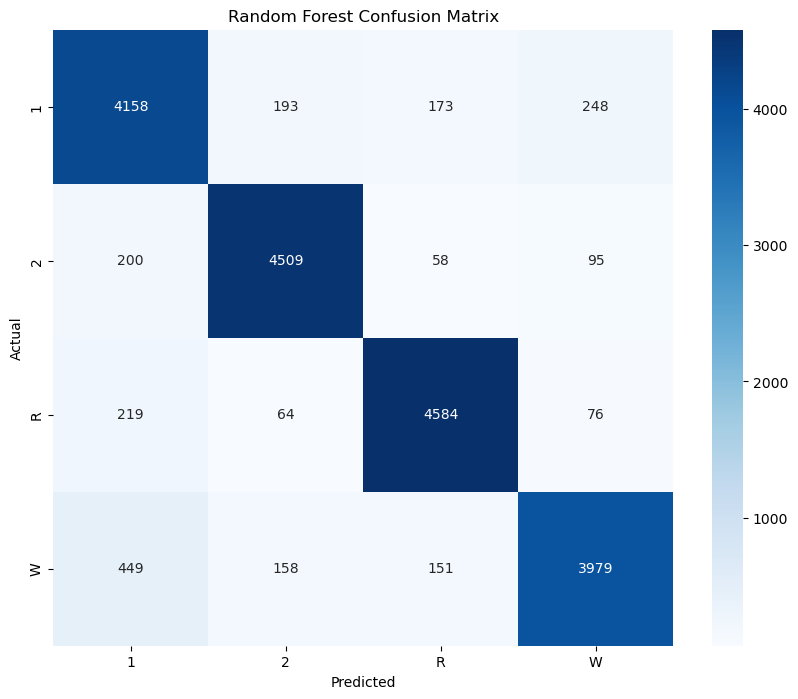

In [9]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:35:03] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7975

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.75      0.73      4772
           2       0.82      0.86      0.84      4862
           R       0.84      0.85      0.84      4943
           W       0.82      0.73      0.77      4737

    accuracy                           0.80     19314
   macro avg       0.80      0.80      0.80     19314
weighted avg       0.80      0.80      0.80     19314



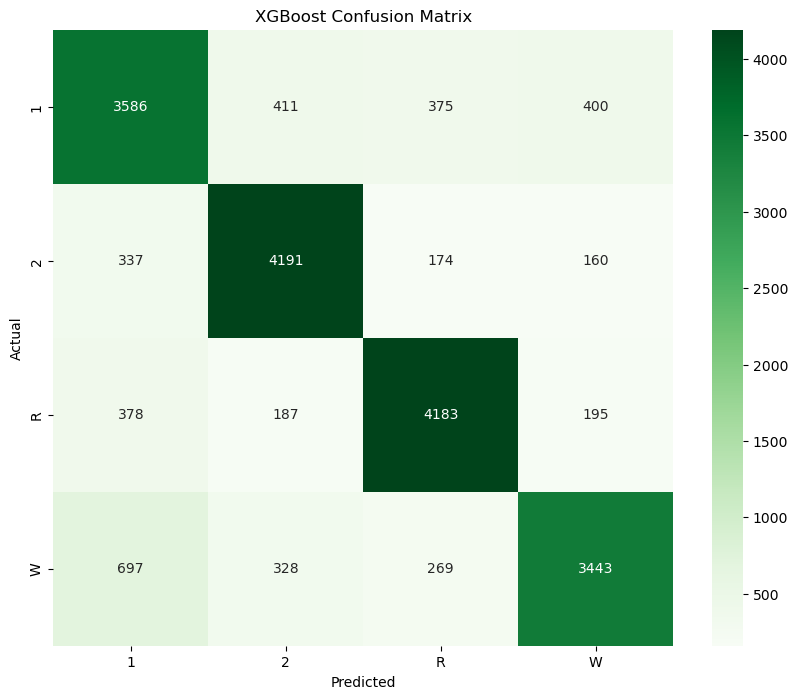

In [10]:
# 2. XGBoost Classifier
# First encode the string labels to integers for XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train XGBoost with encoded labels
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)

# Predictions
y_pred_xgb_encoded = xgb_model.predict(X_test)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

RF+XGBoost Ensemble Accuracy: 0.8714

RF+XGBoost Ensemble Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.84      0.82      4772
           2       0.89      0.92      0.91      4862
           R       0.90      0.91      0.91      4943
           W       0.89      0.81      0.85      4737

    accuracy                           0.87     19314
   macro avg       0.87      0.87      0.87     19314
weighted avg       0.87      0.87      0.87     19314



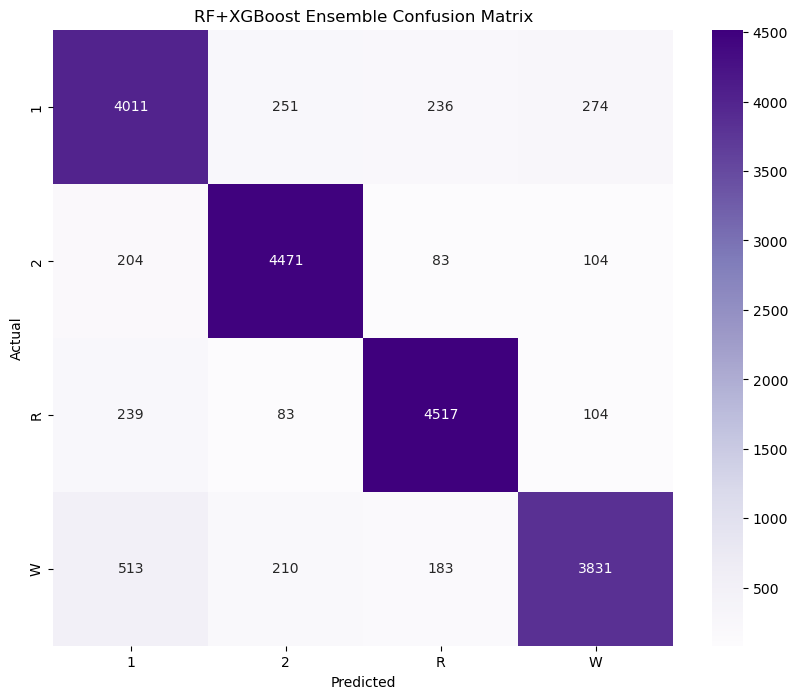

In [11]:
# 3. Ensemble of RF and XGBoost
from sklearn.ensemble import VotingClassifier

# Create and train RF separately
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Create and train XGBoost separately - encode labels
label_encoder_ensemble = LabelEncoder()
y_train_encoded_ensemble = label_encoder_ensemble.fit_transform(y_train)
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train_encoded_ensemble)

# Create a voting ensemble using probabilities from both models
def ensemble_predict(X):
    # Get probabilities from RF
    rf_probs = rf.predict_proba(X)
    
    # Get probabilities from XGBoost (need to match the class order)
    xgb_probs_raw = xgb_clf.predict_proba(X)
    
    # Average the probabilities
    avg_probs = (rf_probs + xgb_probs_raw) / 2
    
    # Get the class with highest probability
    predictions = [rf.classes_[np.argmax(prob)] for prob in avg_probs]
    
    return np.array(predictions)

# Make predictions with the ensemble
y_pred_ensemble = ensemble_predict(X_test)

# Evaluation
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"RF+XGBoost Ensemble Accuracy: {accuracy_ensemble:.4f}")

# Classification report
print("\nRF+XGBoost Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Purples", 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.title("RF+XGBoost Ensemble Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Using device: cpu
Starting LSTM hyperparameter tuning...
Testing LSTM with hidden_size=64, num_layers=1
Testing LSTM with hidden_size=64, num_layers=2
Testing LSTM with hidden_size=128, num_layers=1
Testing LSTM with hidden_size=128, num_layers=2
Testing LSTM with hidden_size=256, num_layers=1
Testing LSTM with hidden_size=256, num_layers=2
Best LSTM parameters: {'hidden_size': 256, 'num_layers': 2, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64}
Best LSTM accuracy: 0.5894

Training final LSTM model with best parameters...
Epoch [1/15], Loss: 1.2944
Epoch [2/15], Loss: 1.2097
Epoch [3/15], Loss: 1.1489
Epoch [4/15], Loss: 1.0906
Epoch [5/15], Loss: 1.0358
Epoch [6/15], Loss: 0.9841
Epoch [7/15], Loss: 0.9365
Epoch [8/15], Loss: 0.8939
Epoch [9/15], Loss: 0.8599
Epoch [10/15], Loss: 0.8264
Epoch [11/15], Loss: 0.7956
Epoch [12/15], Loss: 0.7698
Epoch [13/15], Loss: 0.7414
Epoch [14/15], Loss: 0.7189
Epoch [15/15], Loss: 0.6984
Final Tuned LSTM Accuracy: 0.7259

LSTM Classifica

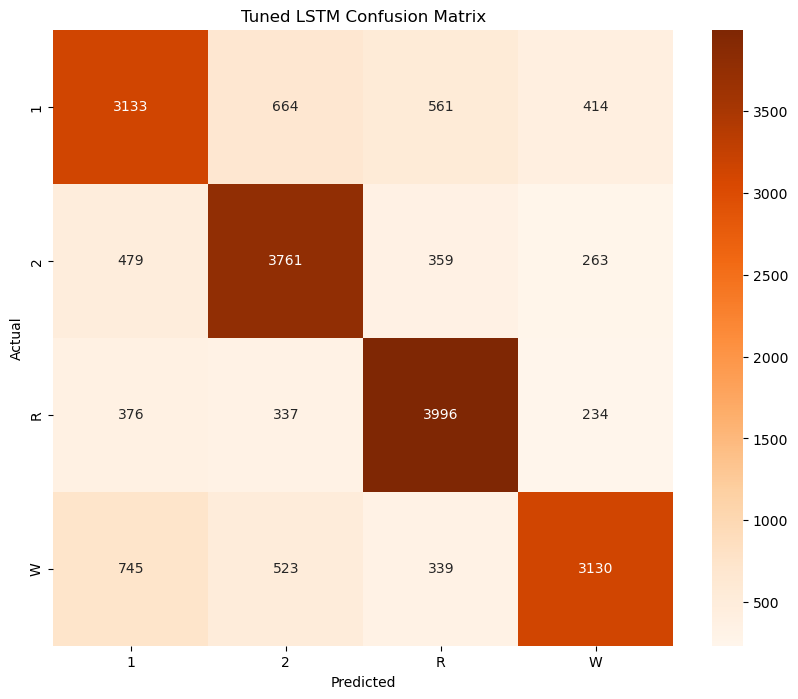

In [12]:
# 4. LSTM Model with Hyperparameter Tuning
import itertools
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Define device for PyTorch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Scale features for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define LSTM model architecture at global scope
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out

# Define hyperparameter grid for LSTM
lstm_param_grid = {
    'hidden_size': [64, 128, 256],
    'num_layers': [1, 2, 3],
    'dropout': [0.1, 0.2, 0.3],
    'learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [32, 64, 128]
}

# Function to train and evaluate LSTM with given hyperparameters
def evaluate_lstm_params(hidden_size, num_layers, dropout, learning_rate, batch_size):
    
    # Create model
    input_size = X_train_scaled.shape[1]
    num_classes = len(y_train.unique())
    model = LSTMModel(input_size, hidden_size, num_layers, num_classes, dropout).to(device)
    
    # Create DataLoader with specified batch size
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_encoded = pd.get_dummies(y_train).values
    y_train_tensor = torch.FloatTensor(y_train_encoded)
    train_dataset = TensorDataset(X_train_tensor.unsqueeze(1), y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Create test tensors
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_test_encoded = pd.get_dummies(y_test).values
    y_test_tensor = torch.FloatTensor(y_test_encoded)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    # Train the model for fewer epochs due to grid search
    num_epochs = 5
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels_indices = torch.argmax(labels, dim=1).to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels_indices)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor.unsqueeze(1).to(device))
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.cpu().numpy()
        
        # Map indices back to original labels
        label_mapping = {i: label for i, label in enumerate(sorted(y_test.unique()))}
        y_pred = np.array([label_mapping[idx] for idx in predicted])
        
        # Return accuracy
        return accuracy_score(y_test, y_pred), model

# Perform grid search (partial to save time)
print("Starting LSTM hyperparameter tuning...")
best_accuracy = 0
best_params = {}
best_lstm_model = None

# To save time, we'll use a subset of the hyperparameter grid
# For a full grid search, you would explore all combinations
for hidden_size in lstm_param_grid['hidden_size']:
    for num_layers in [1, 2]:  # Limiting to 2 options
        for dropout in [0.2]:  # Just using one value
            for learning_rate in [0.001]:  # Just using one value
                for batch_size in [64]:  # Just using one value
                    print(f"Testing LSTM with hidden_size={hidden_size}, num_layers={num_layers}")
                    accuracy, model = evaluate_lstm_params(
                        hidden_size, num_layers, dropout, learning_rate, batch_size
                    )
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {
                            'hidden_size': hidden_size,
                            'num_layers': num_layers,
                            'dropout': dropout,
                            'learning_rate': learning_rate,
                            'batch_size': batch_size
                        }
                        best_lstm_model = model

print(f"Best LSTM parameters: {best_params}")
print(f"Best LSTM accuracy: {best_accuracy:.4f}")

# Train final LSTM model with best parameters
print("\nTraining final LSTM model with best parameters...")
input_size = X_train_scaled.shape[1]
num_classes = len(y_train.unique())
lstm_model = LSTMModel(
    input_size, 
    best_params['hidden_size'], 
    best_params['num_layers'], 
    num_classes, 
    best_params['dropout']
).to(device)

# Create tensors for training
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_encoded = pd.get_dummies(y_train).values
y_train_tensor = torch.FloatTensor(y_train_encoded)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_encoded = pd.get_dummies(y_test).values
y_test_tensor = torch.FloatTensor(y_test_encoded)

# Create DataLoader with optimal batch size
train_dataset = TensorDataset(X_train_tensor.unsqueeze(1), y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)

# Loss and optimizer with optimal learning rate
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=best_params['learning_rate'])

# Train the model with more epochs for final training
num_epochs = 15
for epoch in range(num_epochs):
    lstm_model.train()
    total_loss = 0
    batches = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels_indices = torch.argmax(labels, dim=1).to(device)
        
        # Forward pass
        outputs = lstm_model(inputs)
        loss = criterion(outputs, labels_indices)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        batches += 1
    
    avg_loss = total_loss / batches
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Test the model
lstm_model.eval()
with torch.no_grad():
    outputs = lstm_model(X_test_tensor.unsqueeze(1).to(device))
    _, predicted = torch.max(outputs.data, 1)
    predicted = predicted.cpu().numpy()
    
    # Map indices back to original labels
    label_mapping = {i: label for i, label in enumerate(sorted(y_test.unique()))}
    y_pred_lstm = np.array([label_mapping[idx] for idx in predicted])
    
    # Evaluation
    accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
    print(f"Final Tuned LSTM Accuracy: {accuracy_lstm:.4f}")
    
    # Classification report
    print("\nLSTM Classification Report:")
    print(classification_report(y_test, y_pred_lstm))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm_lstm = confusion_matrix(y_test, y_pred_lstm)
    sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Oranges", 
                xticklabels=sorted(y_test.unique()), 
                yticklabels=sorted(y_test.unique()))
    plt.title("Tuned LSTM Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Starting HMM hyperparameter tuning...
Testing HMM with n_components=2, covariance_type=diag
  - Accuracy: 0.3013
Testing HMM with n_components=2, covariance_type=full


Model is not converging.  Current: 528966.8851556027 is not greater than 529063.8755030578. Delta is -96.99034745513927


  - Accuracy: 0.2932
Testing HMM with n_components=3, covariance_type=diag


Model is not converging.  Current: 68122.5415754472 is not greater than 68122.6259653374. Delta is -0.08438989019487053
Model is not converging.  Current: 171662.80248176635 is not greater than 171662.82021845595. Delta is -0.017736689595039934
Model is not converging.  Current: 158570.98234390042 is not greater than 158574.29558212028. Delta is -3.313238219852792


  - Accuracy: 0.2947
Testing HMM with n_components=3, covariance_type=full


Model is not converging.  Current: 439914.77539668727 is not greater than 459680.21751835494. Delta is -19765.44212166767
Model is not converging.  Current: 480935.468994266 is not greater than 655902.9430135416. Delta is -174967.47401927563


  - Accuracy: 0.2892
Testing HMM with n_components=4, covariance_type=diag


Model is not converging.  Current: 338397.1043068677 is not greater than 338417.6412225774. Delta is -20.536915709730238


  - Accuracy: 0.2952
Testing HMM with n_components=4, covariance_type=full


Model is not converging.  Current: 600300.1461987881 is not greater than 600504.4742532944. Delta is -204.32805450633168
Model is not converging.  Current: 783993.4839230345 is not greater than 784062.680051693. Delta is -69.19612865848467


  - Accuracy: 0.2905

Best HMM parameters: {'n_components': 2, 'covariance_type': 'diag', 'n_iter': 100}
Best HMM accuracy: 0.3013
Final Tuned HMM Accuracy: 0.3013

Tuned HMM Classification Report:
              precision    recall  f1-score   support

           1       0.31      0.24      0.27      4772
           2       0.44      0.09      0.15      4862
           R       0.28      0.70      0.40      4943
           W       0.32      0.16      0.22      4737

    accuracy                           0.30     19314
   macro avg       0.34      0.30      0.26     19314
weighted avg       0.34      0.30      0.26     19314



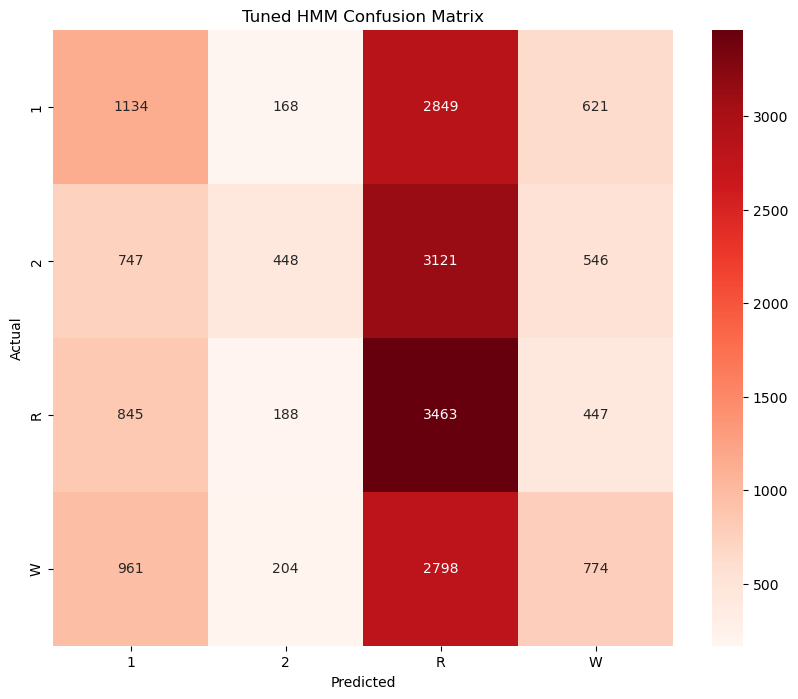

In [13]:
# 5. Hidden Markov Model (HMM) with Hyperparameter Tuning
# Import GaussianHMM from hmmlearn
from hmmlearn.hmm import GaussianHMM

# Define hyperparameter grid for HMM
hmm_param_grid = {
    'n_components': [2, 3, 4, 5],
    'covariance_type': ['diag', 'full', 'tied', 'spherical'],
    'n_iter': [50, 100, 150]
}

# Prepare data for HMM
# First, scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to numbers for HMM
unique_labels = sorted(y_train.unique())
label_to_id = {label: idx for idx, label in enumerate(unique_labels)}
id_to_label = {idx: label for label, idx in label_to_id.items()}

y_train_numeric = np.array([label_to_id[label] for label in y_train])
y_test_numeric = np.array([label_to_id[label] for label in y_test])

n_states = len(unique_labels)
n_features = X_train.shape[1]

# Function to train and evaluate HMM with given hyperparameters
def evaluate_hmm_params(n_components, covariance_type, n_iter):
    best_accuracy = 0
    best_models = []
    
    # Train separate HMMs for each class with these parameters
    for i in range(n_states):
        # Get samples for this class
        class_samples = X_train_scaled[y_train_numeric == i]
        
        if len(class_samples) > 0:
            # Train HMM
            try:
                model = GaussianHMM(
                    n_components=n_components,
                    covariance_type=covariance_type,
                    n_iter=n_iter,
                    random_state=42
                )
                model.fit(class_samples)
                best_models.append(model)
            except Exception as e:
                print(f"Error training HMM for class {id_to_label[i]} with params {n_components}, {covariance_type}: {e}")
                # Create a dummy model
                model = GaussianHMM(n_components=2, covariance_type="diag")
                best_models.append(model)
        else:
            # Create a dummy model
            model = GaussianHMM(n_components=2, covariance_type="diag")
            best_models.append(model)
    
    # Use HMMs for prediction
    y_pred = []
    for i in range(len(X_test_scaled)):
        sample = X_test_scaled[i].reshape(1, -1)
        
        # Calculate score (log-likelihood) for each model
        scores = []
        for j, hmm_model in enumerate(best_models):
            try:
                score = hmm_model.score(sample)
                scores.append(score)
            except Exception:
                scores.append(float('-inf'))  # Very low score for models that fail
        
        # Choose the model with highest score
        if len(scores) > 0:
            best_class = np.argmax(scores)
            y_pred.append(id_to_label[best_class])
        else:
            # Fallback to most common class
            most_common = y_train.value_counts().idxmax()
            y_pred.append(most_common)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, best_models

# Perform grid search for HMM (partial to save time)
print("Starting HMM hyperparameter tuning...")
best_accuracy = 0
best_params = {}
best_hmm_models = None

# To save time, we'll test a subset of the hyperparameter grid
for n_components in [2, 3, 4]:  # Testing fewer components
    for covariance_type in ['diag', 'full']:  # Testing only two covariance types
        for n_iter in [100]:  # Just one value for iterations
            print(f"Testing HMM with n_components={n_components}, covariance_type={covariance_type}")
            try:
                accuracy, models = evaluate_hmm_params(n_components, covariance_type, n_iter)
                print(f"  - Accuracy: {accuracy:.4f}")
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'n_components': n_components,
                        'covariance_type': covariance_type,
                        'n_iter': n_iter
                    }
                    best_hmm_models = models
            except Exception as e:
                print(f"  - Error during evaluation: {e}")

print(f"\nBest HMM parameters: {best_params}")
print(f"Best HMM accuracy: {best_accuracy:.4f}")

# Final evaluation with the best models
if best_hmm_models:
    # Use best HMMs for prediction
    y_pred_hmm = []
    for i in range(len(X_test_scaled)):
        sample = X_test_scaled[i].reshape(1, -1)
        
        # Calculate score (log-likelihood) for each model
        scores = []
        for j, hmm_model in enumerate(best_hmm_models):
            try:
                score = hmm_model.score(sample)
                scores.append(score)
            except Exception:
                scores.append(float('-inf'))  # Very low score for models that fail
        
        # Choose the model with highest score
        if len(scores) > 0:
            best_class = np.argmax(scores)
            y_pred_hmm.append(id_to_label[best_class])
        else:
            # Fallback to most common class
            most_common = y_train.value_counts().idxmax()
            y_pred_hmm.append(most_common)
    
    # Evaluate HMM performance
    accuracy_hmm = accuracy_score(y_test, y_pred_hmm)
    print(f"Final Tuned HMM Accuracy: {accuracy_hmm:.4f}")
    
    # Classification report
    print("\nTuned HMM Classification Report:")
    print(classification_report(y_test, y_pred_hmm))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm_hmm = confusion_matrix(y_test, y_pred_hmm)
    sns.heatmap(cm_hmm, annot=True, fmt="d", cmap="Reds", 
                xticklabels=sorted(y_test.unique()), 
                yticklabels=sorted(y_test.unique()))
    plt.title("Tuned HMM Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Starting RNN hyperparameter tuning...
Testing RNN with hidden_size=64, num_layers=1
Testing RNN with hidden_size=64, num_layers=2
Testing RNN with hidden_size=128, num_layers=1
Testing RNN with hidden_size=128, num_layers=2
Testing RNN with hidden_size=256, num_layers=1
Testing RNN with hidden_size=256, num_layers=2
Best RNN parameters: {'hidden_size': 256, 'num_layers': 2, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64}
Best RNN accuracy: 0.5136

Training final RNN model with best parameters...
Epoch [1/15], Loss: 1.3522
Epoch [2/15], Loss: 1.3238
Epoch [3/15], Loss: 1.2747
Epoch [4/15], Loss: 1.2222
Epoch [5/15], Loss: 1.1877
Epoch [6/15], Loss: 1.1530
Epoch [7/15], Loss: 1.1279
Epoch [8/15], Loss: 1.1037
Epoch [9/15], Loss: 1.0828
Epoch [10/15], Loss: 1.0633
Epoch [11/15], Loss: 1.0470
Epoch [12/15], Loss: 1.0310
Epoch [13/15], Loss: 1.0118
Epoch [14/15], Loss: 0.9930
Epoch [15/15], Loss: 0.9788
Final Tuned RNN Accuracy: 0.6424

RNN Classification Report:
              pre

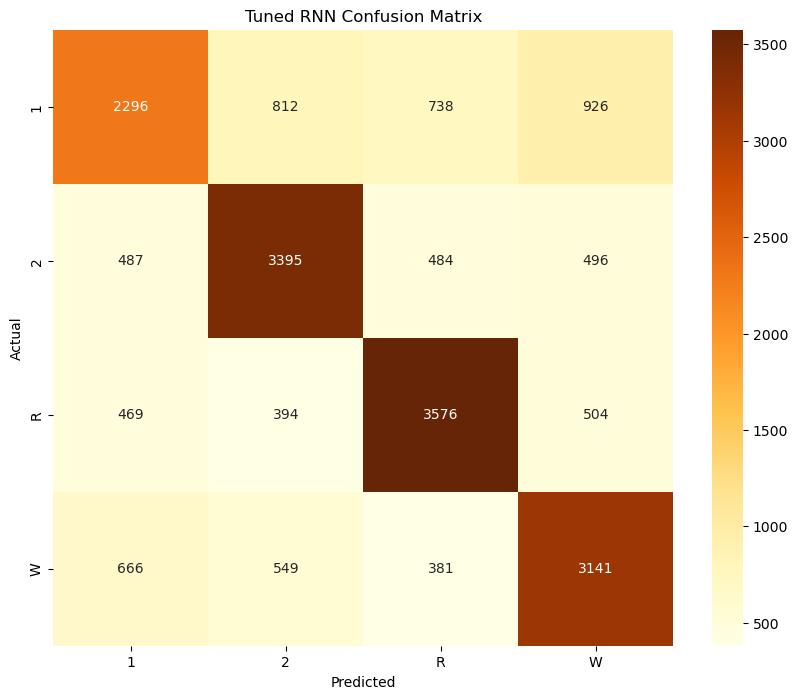

In [14]:
# 6. RNN Model with Hyperparameter Tuning
# Define hyperparameter grid for RNN
rnn_param_grid = {
    'hidden_size': [64, 128, 256],
    'num_layers': [1, 2, 3],
    'dropout': [0.1, 0.2, 0.3],
    'learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [32, 64, 128]
}

# Define RNN model - moved outside of the function to be available globally
class SimpleRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate):
        super(SimpleRNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out

# Function to train and evaluate RNN with given hyperparameters
def evaluate_rnn_params(hidden_size, num_layers, dropout, learning_rate, batch_size):
    # Create model using the class defined above
    
    # Create model
    input_size = X_train_scaled.shape[1]
    num_classes = len(y_train.unique())
    model = SimpleRNNModel(input_size, hidden_size, num_layers, num_classes, dropout).to(device)
    
    # Create DataLoader with specified batch size
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_encoded = pd.get_dummies(y_train).values
    y_train_tensor = torch.FloatTensor(y_train_encoded)
    train_dataset = TensorDataset(X_train_tensor.unsqueeze(1), y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Create test tensors
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_test_encoded = pd.get_dummies(y_test).values
    y_test_tensor = torch.FloatTensor(y_test_encoded)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    # Train the model for fewer epochs due to grid search
    num_epochs = 5
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels_indices = torch.argmax(labels, dim=1).to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels_indices)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor.unsqueeze(1).to(device))
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.cpu().numpy()
        
        # Map indices back to original labels
        label_mapping = {i: label for i, label in enumerate(sorted(y_test.unique()))}
        y_pred = np.array([label_mapping[idx] for idx in predicted])
        
        # Return accuracy
        return accuracy_score(y_test, y_pred), model

# Perform grid search (partial to save time)
print("Starting RNN hyperparameter tuning...")
best_accuracy = 0
best_params = {}
best_rnn_model = None

# To save time, we'll use a subset of the hyperparameter grid
for hidden_size in rnn_param_grid['hidden_size']:
    for num_layers in [1, 2]:  # Limiting to 2 options
        for dropout in [0.2]:  # Just using one value
            for learning_rate in [0.001]:  # Just using one value
                for batch_size in [64]:  # Just using one value
                    print(f"Testing RNN with hidden_size={hidden_size}, num_layers={num_layers}")
                    accuracy, model = evaluate_rnn_params(
                        hidden_size, num_layers, dropout, learning_rate, batch_size
                    )
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {
                            'hidden_size': hidden_size,
                            'num_layers': num_layers,
                            'dropout': dropout,
                            'learning_rate': learning_rate,
                            'batch_size': batch_size
                        }
                        best_rnn_model = model

print(f"Best RNN parameters: {best_params}")
print(f"Best RNN accuracy: {best_accuracy:.4f}")

# Train final RNN model with best parameters
print("\nTraining final RNN model with best parameters...")
rnn_model = SimpleRNNModel(
    input_size, 
    best_params['hidden_size'], 
    best_params['num_layers'], 
    num_classes, 
    best_params['dropout']
).to(device)

# Create DataLoader with optimal batch size
train_dataset = TensorDataset(X_train_tensor.unsqueeze(1), y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)

# Loss and optimizer with optimal learning rate
criterion = nn.CrossEntropyLoss()
rnn_optimizer = torch.optim.Adam(rnn_model.parameters(), lr=best_params['learning_rate'])

# Train the model with more epochs for final training
num_epochs = 15
for epoch in range(num_epochs):
    rnn_model.train()
    total_loss = 0
    batches = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels_indices = torch.argmax(labels, dim=1).to(device)
        
        # Forward pass
        outputs = rnn_model(inputs)
        loss = criterion(outputs, labels_indices)
        
        # Backward and optimize
        rnn_optimizer.zero_grad()
        loss.backward()
        rnn_optimizer.step()
        
        total_loss += loss.item()
        batches += 1
    
    avg_loss = total_loss / batches
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Test the model
rnn_model.eval()
with torch.no_grad():
    outputs = rnn_model(X_test_tensor.unsqueeze(1).to(device))
    _, predicted = torch.max(outputs.data, 1)
    predicted = predicted.cpu().numpy()
    
    # Map indices back to original labels
    label_mapping = {i: label for i, label in enumerate(sorted(y_test.unique()))}
    y_pred_rnn = np.array([label_mapping[idx] for idx in predicted])
    
    # Evaluation
    accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
    print(f"Final Tuned RNN Accuracy: {accuracy_rnn:.4f}")
    
    # Classification report
    print("\nRNN Classification Report:")
    print(classification_report(y_test, y_pred_rnn))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm_rnn = confusion_matrix(y_test, y_pred_rnn)
    sns.heatmap(cm_rnn, annot=True, fmt="d", cmap="YlOrBr", 
                xticklabels=sorted(y_test.unique()), 
                yticklabels=sorted(y_test.unique()))
    plt.title("Tuned RNN Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Starting SVM hyperparameter tuning...
Training SVM with grid search...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .....svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=17.6min
[CV] END .....svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=17.7min
[CV] END .....svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=17.8min
[CV] END .......svm__C=10, svm__gamma=scale, svm__kernel=rbf; total time=21.9min
[CV] END .......svm__C=10, svm__gamma=scale, svm__kernel=rbf; total time=22.0min
[CV] END .......svm__C=10, svm__gamma=scale, svm__kernel=rbf; total time=22.1min
[CV] END ........svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time=22.4min
[CV] END ........svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time=22.5min
[CV] END ........svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time=22.5min
[CV] END ....svm__C=10, svm__gamma=scale, svm__kernel=linear; total time=31.8min
[CV] END ....svm__C=10, svm__gamma=scale, svm__kernel=linea

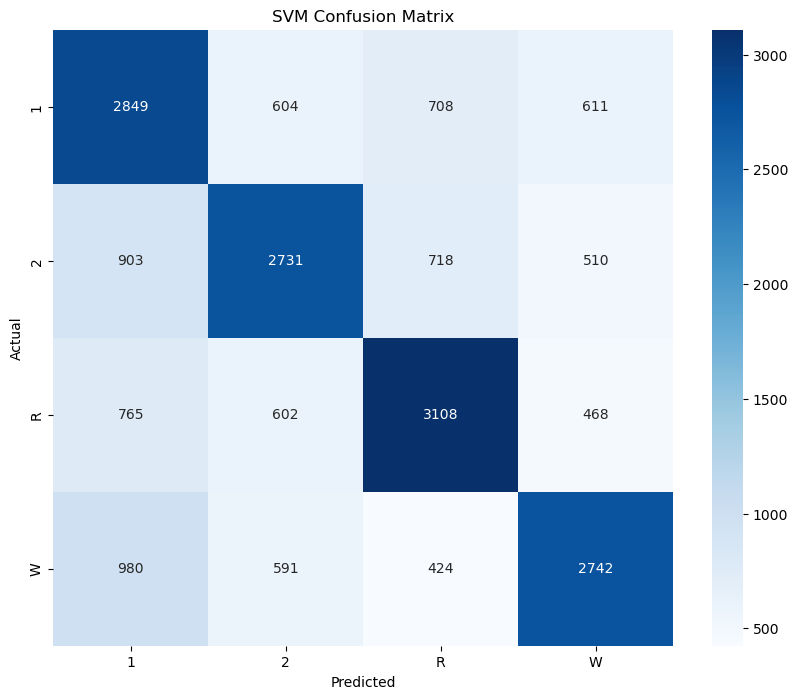

In [15]:
# 7. Support Vector Machine (SVM) with Hyperparameter Tuning
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for SVM
svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto', 0.1, 0.01],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

# Create pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

print("Starting SVM hyperparameter tuning...")
# To save time, we'll use a smaller parameter grid for demonstration
# In a real scenario, you might want to test more combinations
svm_small_grid = {
    'svm__C': [1, 10],
    'svm__gamma': ['scale'],
    'svm__kernel': ['rbf', 'linear']
}

# Perform Grid Search - use smaller grid to save time
grid_search = GridSearchCV(
    pipeline, svm_small_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2
)

print("Training SVM with grid search...")
grid_search.fit(X_train, y_train)

# Get best model
best_svm_model = grid_search.best_estimator_
print(f"Best SVM parameters: {grid_search.best_params_}")
print(f"Best SVM CV accuracy: {grid_search.best_score_:.4f}")

# Make predictions with best SVM model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate SVM performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {accuracy_svm:.4f}")

# Classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Model Comparison:
           Model  Accuracy  F1 Score  Precision    Recall
0  Random Forest  0.892099  0.892133   0.893060  0.892099
1        XGBoost  0.797504  0.797155   0.798672  0.797504
2           LSTM  0.725898  0.724966   0.727277  0.725898
3            RNN  0.642436  0.639271   0.639488  0.642436
4            SVM  0.591799  0.592527   0.595596  0.591799
5            HMM  0.301284  0.261168   0.339830  0.301284


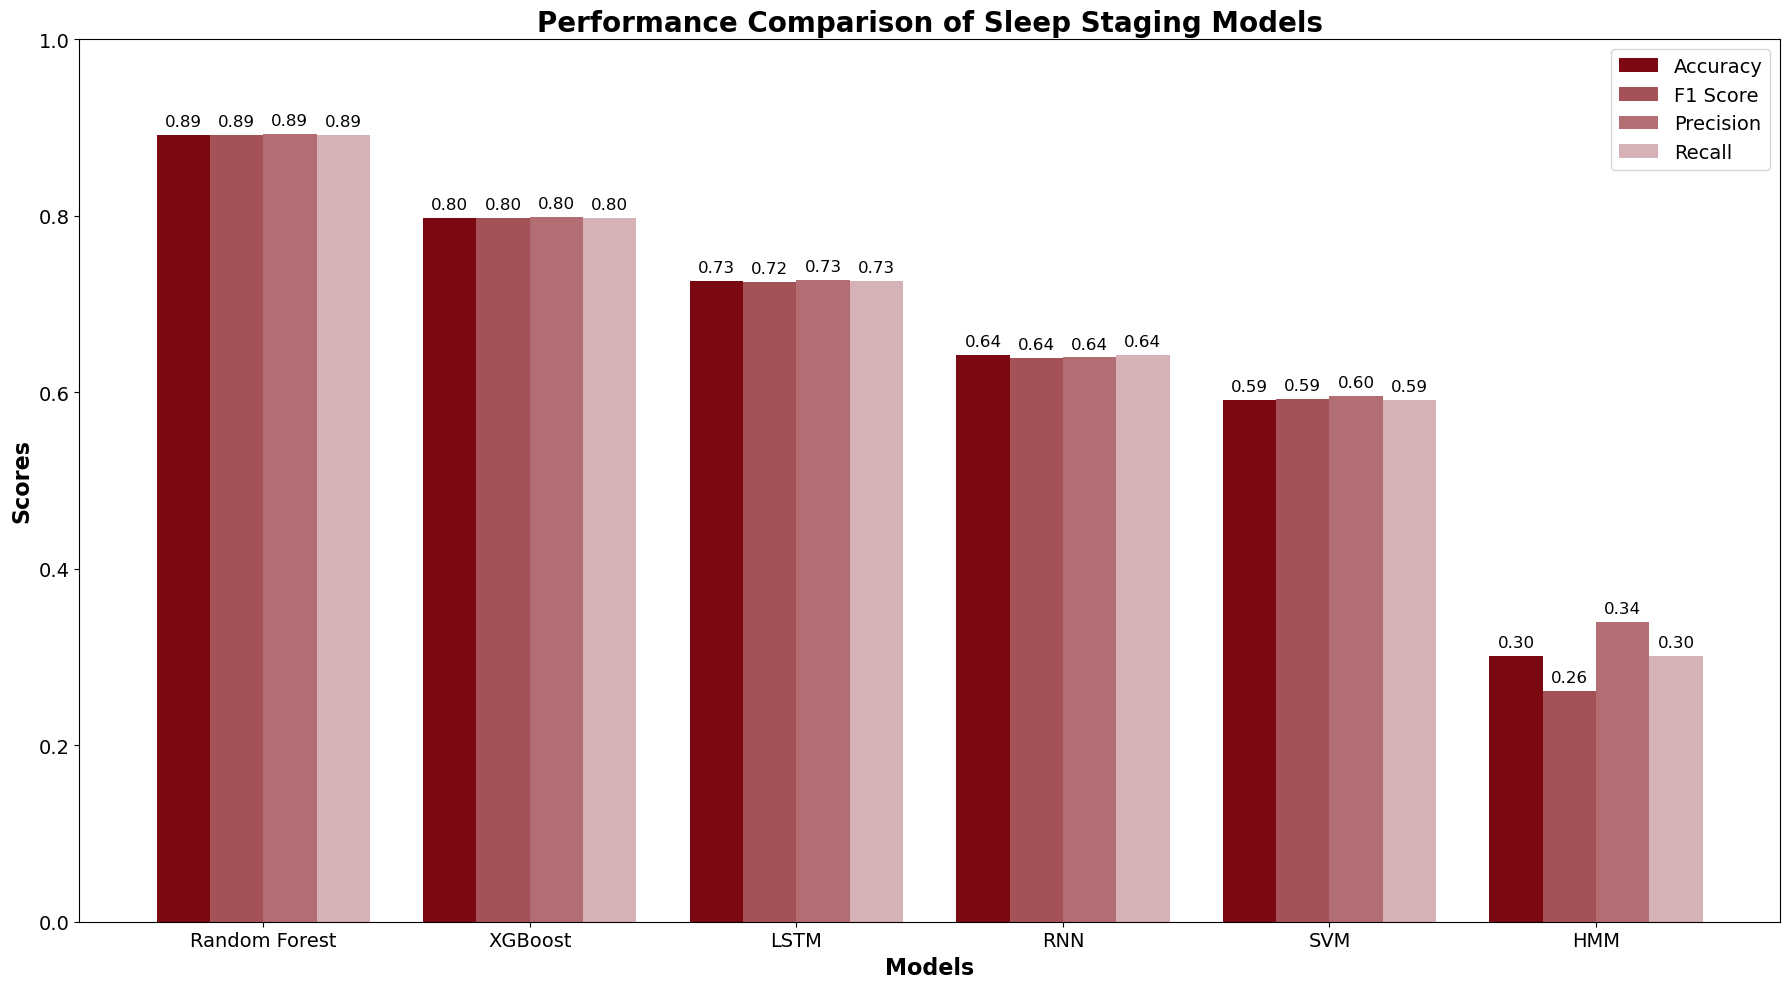

In [17]:
# Model Comparison Summary
# Corrected order
models = ['Random Forest', 'XGBoost', 'LSTM', 'RNN', 'SVM', 'HMM']

# Reorder metric lists to match the new model order
accuracies = [accuracy_rf, accuracy_xgb, accuracy_lstm, accuracy_rnn, accuracy_svm, accuracy_hmm]

# Calculate additional metrics for all models
f1_scores = []
precision_scores = []
recall_scores = []

for y_pred in [y_pred_rf, y_pred_xgb, y_pred_lstm, y_pred_rnn, y_pred_svm, y_pred_hmm]:
    # Calculate weighted metrics to handle multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
})

print("Model Comparison:")
print(comparison_df)

# Plot comparison with increased figure size to accommodate horizontal labels
plt.figure(figsize=(18, 10))  # Increased width to accommodate the additional model

# Set width of bars
barWidth = 0.2
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create bars with different shades of blue (all darker than before)
plt.bar(r1, accuracies, width=barWidth, label='Accuracy', color='#7c0811')  # Very dark blue
plt.bar(r2, f1_scores, width=barWidth, label='F1 Score', color='#a45258')   # Dark blue
plt.bar(r3, precision_scores, width=barWidth, label='Precision', color='#b26e73')  # Medium blue
plt.bar(r4, recall_scores, width=barWidth, label='Recall', color='#d6b1b5')  # Lighter blue (but still visible)

# Add labels and legend with increased font sizes
plt.xlabel('Models', fontsize=16, fontweight='bold')
plt.ylabel('Scores', fontsize=16, fontweight='bold')
plt.xticks([r + barWidth*1.5 for r in range(len(models))], models, rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Performance Comparison of Sleep Staging Models', fontsize=20, fontweight='bold')
plt.legend(fontsize=14)
plt.ylim(0, 1)

# Add value labels on top of bars with increased font size
for i, v in enumerate(accuracies):
    plt.text(r1[i], v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

for i, v in enumerate(f1_scores):
    plt.text(r2[i], v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

for i, v in enumerate(precision_scores):
    plt.text(r3[i], v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

for i, v in enumerate(recall_scores):
    plt.text(r4[i], v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

# Add more space at the bottom to ensure labels fit well
plt.subplots_adjust(bottom=0.15)

plt.tight_layout()
plt.show()